## Bill Authentication using SVM

#### The goal is to predict whether the bank currency notes are real or fake using Support Vector Machine algorithm. A Support Vector Machine (SVM) is a supervised machine learning algorithm that can be employed for both classification and regression purposes.

#### Importing the necessary libraries and the csv file 

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sb

In [17]:
bankdata=pd.read_csv('C:/Users/Vivek/Downloads/bill_authentication.csv')
bankdata.shape

(1372, 5)

In [18]:
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [19]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Variance    1372 non-null float64
Skewness    1372 non-null float64
Curtosis    1372 non-null float64
Entropy     1372 non-null float64
Class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


#### The dataset contains 1372 rows and 5 columns and we don't have any null value. We can classify the real and fake notes based upon four attributes of the note i.e. skewness of the wavelet transformed image, variance of the image, entropy of the image, and curtosis of the image.

#### The following graphs show how the values of skweness, variance, entropy and curtosis vary with respect to the class which is either 0 or 1 (fake or real)

Class
0    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
1    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

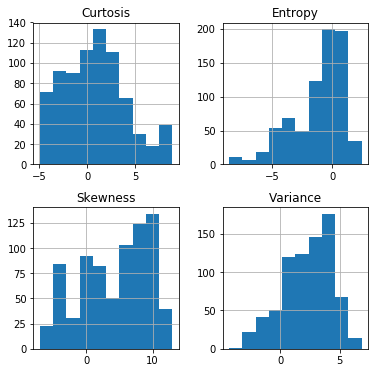

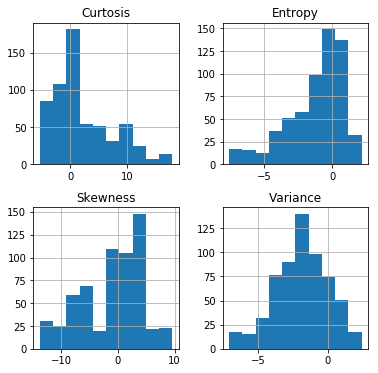

In [20]:
bankdata.groupby('Class').hist(figsize=(6,6))

C:\Users\Vivek\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Vivek\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


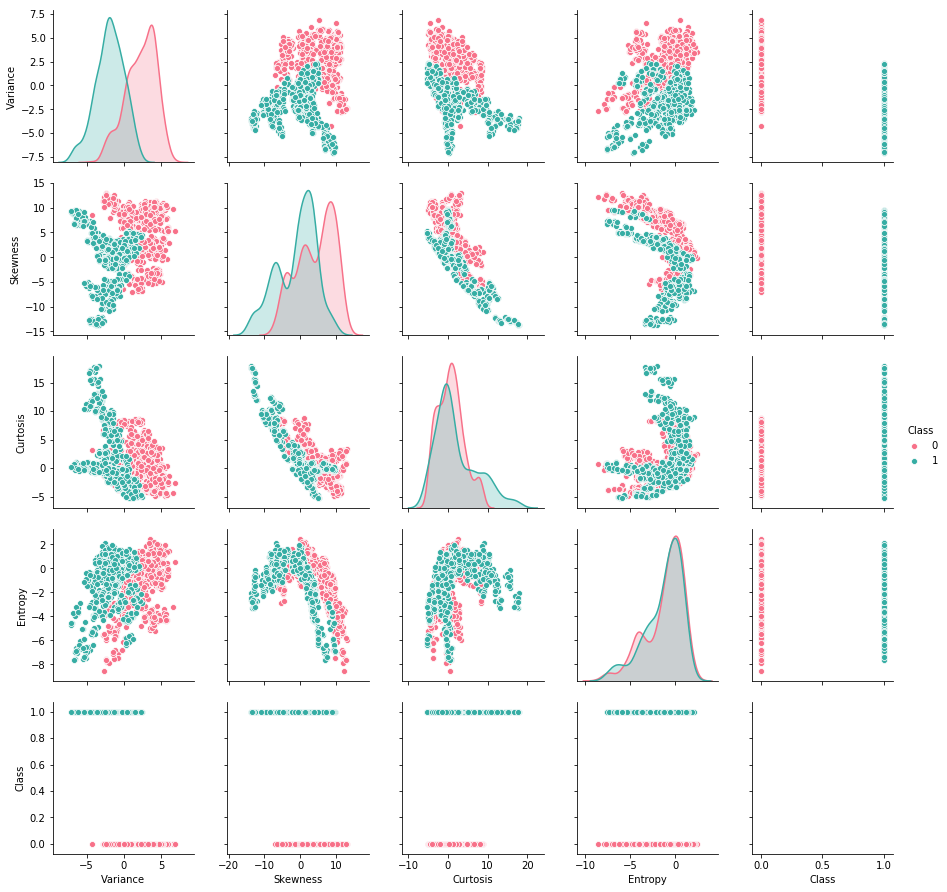

In [21]:
sb.pairplot(bankdata,hue='Class',diag_kind='kde',kind='scatter',palette='husl')
plt.show()

In [22]:
X=bankdata.drop('Class', axis=1)
y=bankdata['Class']

##### Splitting the data into training and testing data

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20)

#### Using SVM to classify

In [24]:
from sklearn.svm import SVC
svclassifier=SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [25]:
#Making predictions
y_pred= svclassifier.predict(X_test)
type(y_pred)

numpy.ndarray

In [26]:
from sklearn.metrics import accuracy_score
print('Accuracy score:', accuracy_score(y_test,y_pred))

Accuracy score: 0.9963636363636363


#### We can see that the accuracy with which SVM is able to classify is 99%

### Confusion Matrix and ROC

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[147   0]
 [  1 127]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       147
           1       1.00      0.99      1.00       128

   micro avg       1.00      1.00      1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic(ROC) curve')
    plt.show()

AUC: 1.00


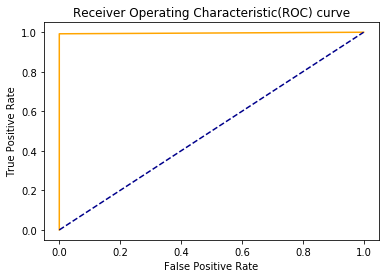

In [29]:
auc=roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds=roc_curve(y_test, y_pred)
plot_roc_curve(fpr,tpr)